# Kernel density estimation

In [65]:
%load_ext autoreload
%autoreload v2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
import numpy as np
import matplotlib.pylab as plt

In [67]:
def gaussian(x,b=1):
    return np.exp(-x**2/(2*b**2))/(b*np.sqrt(2*np.pi))

In [68]:
X=np.array(list(np.random.normal(loc=2, scale=0.9, size=14)) + list(np.random.normal(loc=-2, scale=0.9, size=14)))

In [69]:
N=len(X)
N

28

/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':
/home/adam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(0, 0.9, 'Histogram, normed, bin=1.5')

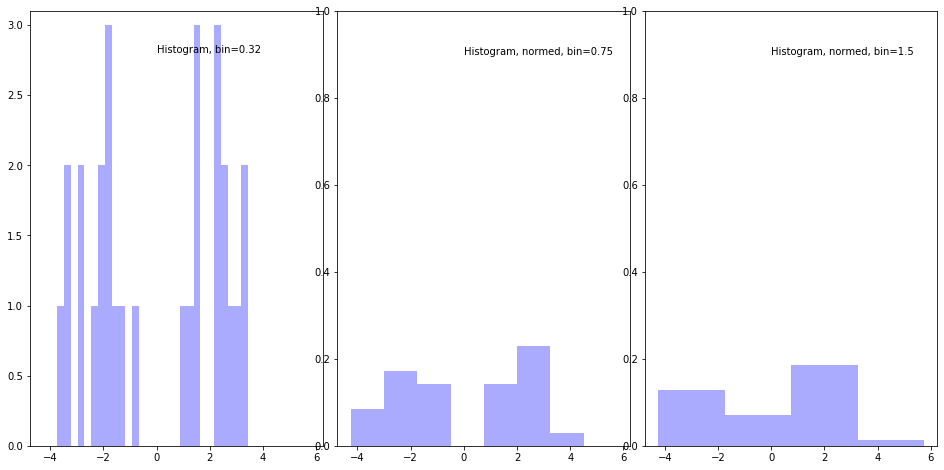

In [70]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(14,8))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)
ax[0].set_ylim([0,3.1])
ax[1].set_ylim([0,1])
ax[2].set_ylim([0,1])

bins = np.linspace(-5, 5, 40)
ax[0].hist(X[:], bins=bins + 0.75, fc='#AAAAFF', normed=False)
ax[0].text(0, 2.8, "Histogram, bin=0.32")

bins = np.linspace(-5, 5, 9)
ax[1].hist(X[:], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[1].text(0, 0.9, "Histogram, normed, bin=0.75")


bins = np.linspace(-5, 5, 5)
bins[1]-bins[0]
ax[2].hist(X[:], bins=bins + 0.75, fc='#AAAAFF', normed=True)
ax[2].text(0, 0.9, "Histogram, normed, bin=1.5")

In [75]:
X_plot = np.linspace(-5, 5, 100).reshape((-1,1))
X_plot[:10]

array([[-5.        ],
       [-4.8989899 ],
       [-4.7979798 ],
       [-4.6969697 ],
       [-4.5959596 ],
       [-4.49494949],
       [-4.39393939],
       [-4.29292929],
       [-4.19191919],
       [-4.09090909]])

In [76]:
X[0]

3.0971457185805518

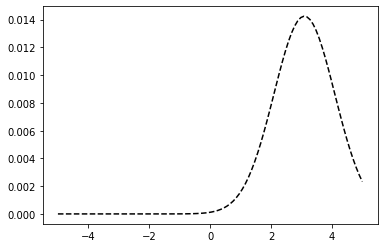

In [77]:
plt.plot(X_plot, (gaussian(X_plot-X[0]))/N, '-k', linestyle="dashed")

## KDE build

Text(0, 0.9, 'Gaussian, b=0.35')

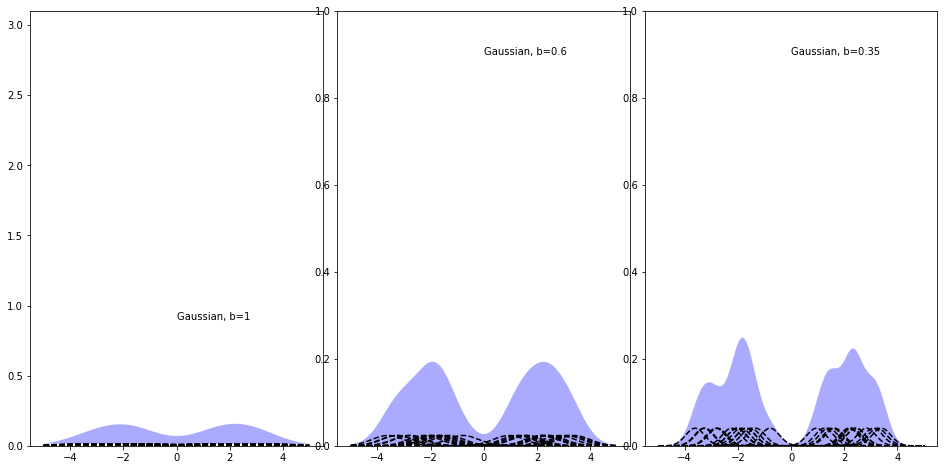

In [78]:
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(14,8))
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)
ax[0].set_ylim([0,3.1])
ax[1].set_ylim([0,1])
ax[2].set_ylim([0,1])

sum1=np.zeros(len(X_plot))
sum2=np.zeros(len(X_plot))
sum3=np.zeros(len(X_plot))

for i in range(0, N):
    ax[0].plot(X_plot, (gaussian(X_plot-X[i]))/N, '-k', linestyle="dashed")
    sum1+=((gaussian(X_plot-X[i]))/N)[:,0]
    ax[1].plot(X_plot, (gaussian(X_plot-X[i],0.6))/N, '-k', linestyle="dashed")
    sum2+=((gaussian(X_plot-X[i],0.6))/N)[:,0]
    ax[2].plot(X_plot, (gaussian(X_plot-X[i],0.35))/N, '-k', linestyle="dashed")
    sum3+=((gaussian(X_plot-X[i],0.35))/N)[:,0]    
    
ax[0].fill(X_plot, sum1, '-k', fc='#AAAAFF')
ax[0].text(0, 0.9, "Gaussian, b=1")
ax[1].fill(X_plot, sum2, '-k', fc='#AAAAFF')
ax[1].text(0, 0.9, "Gaussian, b=0.6")
ax[2].fill(X_plot, sum3, '-k', fc='#AAAAFF')
ax[2].text(0, 0.9, "Gaussian, b=0.35")

## KDE Sampling

In [79]:
import seaborn as sns

/home/adam/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/adam/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


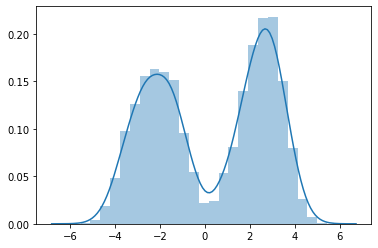

In [88]:
sns.distplot(np.random.multivariate_normal(np.random.choice(X, 100), np.identity(100)*0.35, 100).flatten())